In [1]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
import tensorflow as tf
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

Tatasteel price from 01.01.2010 to 30.6.2021


In [3]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2021,6,30)
tsteel_data = gh(symbol='TATASTEEL', start = start, end = end)

In [4]:
tsteel_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2010-01-04,TATASTEEL,EQ,617.70,622.00,636.5,616.90,636.25,633.75,628.71,5569757,3.501788e+14,NaN,1107657,0.1989
2010-01-05,TATASTEEL,EQ,633.75,638.55,654.8,638.55,647.60,649.10,648.67,7801935,5.060916e+14,NaN,2824636,0.3620
2010-01-06,TATASTEEL,EQ,649.10,660.00,660.0,637.00,643.20,642.05,645.32,7350435,4.743349e+14,NaN,2285424,0.3109
2010-01-07,TATASTEEL,EQ,642.05,644.90,652.8,640.10,647.20,649.80,646.56,7635704,4.936949e+14,NaN,2342356,0.3068
2010-01-08,TATASTEEL,EQ,649.80,651.00,661.5,640.90,648.60,648.45,650.67,8199586,5.335209e+14,NaN,2545487,0.3104


In [5]:
tsteel_data = tsteel_data.drop(columns = ['Symbol', 'Series','Trades'])
tsteel_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,
2010-01-04,617.70,622.00,636.5,616.90,636.25,633.75,628.71,5569757,3.501788e+14,1107657,0.1989
2010-01-05,633.75,638.55,654.8,638.55,647.60,649.10,648.67,7801935,5.060916e+14,2824636,0.3620
2010-01-06,649.10,660.00,660.0,637.00,643.20,642.05,645.32,7350435,4.743349e+14,2285424,0.3109
2010-01-07,642.05,644.90,652.8,640.10,647.20,649.80,646.56,7635704,4.936949e+14,2342356,0.3068
2010-01-08,649.80,651.00,661.5,640.90,648.60,648.45,650.67,8199586,5.335209e+14,2545487,0.3104


In [6]:
tsteel_data.tail()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,
2021-06-24,1100.10,1105.00,1120.5,1098.45,1119.00,1113.15,1111.66,7239470,8.047857e+14,1667934,0.2304
2021-06-25,1113.15,1135.00,1170.0,1130.00,1165.50,1165.25,1157.46,18022770,2.086064e+15,4041495,0.2242
2021-06-28,1165.25,1174.00,1189.0,1163.00,1185.00,1184.00,1178.64,11660335,1.374332e+15,2073657,0.1778
2021-06-29,1184.00,1184.50,1192.0,1165.55,1174.25,1172.55,1176.74,7803759,9.183011e+14,1344220,0.1723
2021-06-30,1172.55,1181.05,1191.0,1162.80,1164.95,1166.60,1179.73,8043267,9.488863e+14,1365428,0.1698


In [7]:
tsteel_data.shape

(2855, 11)

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
training_set = sc.fit_transform(tsteel_data)

In [9]:
#Total records = 2855
#Train set = first 2850 records
#Test set = from 2851 to 2854 (row)
X_train = []
y_train = []
for i in range(60, 2851):
    X_train.append(training_set[i-60:i, :])
    y_train.append(training_set[i, 5])
    
X_test = []
y_test = []
for i in range(2851, 2855):
    X_test.append(training_set[i-60:i, :])
    y_test.append(training_set[i, 5])

In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)
y_train = y_train.reshape(-1,1)
print(X_train.shape)
print(y_train.shape)

(2791, 60, 11)
(2791, 1)


In [11]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 11))
print(X_train.shape)

(2791, 60, 11)


In [12]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],11)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dense(units=1))


In [26]:
from sklearn.metrics import r2_score
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
2791/2791 [==============================] - 73s 26ms/step - loss: 3.0404e-04
Epoch 2/100
2791/2791 [==============================] - 70s 25ms/step - loss: 2.9178e-04
Epoch 3/100
2791/2791 [==============================] - 71s 25ms/step - loss: 2.6944e-04
Epoch 4/100
2791/2791 [==============================] - 70s 25ms/step - loss: 2.6799e-04
Epoch 5/100
2791/2791 [==============================] - 69s 25ms/step - loss: 2.4603e-04
Epoch 6/100
2791/2791 [==============================] - 65s 23ms/step - loss: 2.7157e-04
Epoch 7/100
2791/2791 [==============================] - 66s 24ms/step - loss: 2.5416e-04
Epoch 8/100
2791/2791 [==============================] - 66s 24ms/step - loss: 2.2839e-04
Epoch 9/100
2791/2791 [==============================] - 68s 24ms/step - loss: 2.4417e-04
Epoch 10/100
2791/2791 [==============================] - 66s 24ms/step - loss: 2.4739e-04
Epoch 11/100
2791/2791 [==============================] - 68s 24ms/step - loss: 2.3085e-04
Epoch 12

2791/2791 [==============================] - 62s 22ms/step - loss: 1.8457e-04
Epoch 91/100
2791/2791 [==============================] - 62s 22ms/step - loss: 1.6409e-04
Epoch 92/100
2791/2791 [==============================] - 62s 22ms/step - loss: 1.6901e-04
Epoch 93/100
2791/2791 [==============================] - 62s 22ms/step - loss: 1.6560e-04
Epoch 94/100
2791/2791 [==============================] - 62s 22ms/step - loss: 1.7679e-04
Epoch 95/100
2791/2791 [==============================] - 62s 22ms/step - loss: 1.6627e-04
Epoch 96/100
2791/2791 [==============================] - 62s 22ms/step - loss: 1.7010e-04
Epoch 97/100
2791/2791 [==============================] - 62s 22ms/step - loss: 1.7372e-04
Epoch 98/100
2791/2791 [==============================] - 62s 22ms/step - loss: 1.5971e-04
Epoch 99/100
2791/2791 [==============================] - 62s 22ms/step - loss: 1.8267e-04
Epoch 100/100
2791/2791 [==============================] - 62s 22ms/step - loss: 1.7112e-04


In [14]:
X_test, y_test = np.array(X_test), np.array(y_test)
y_test = np.reshape(y_test,(-1,1))

In [15]:
print(X_test.shape)
print(y_test.shape)

(4, 60, 11)
(4, 1)


In [16]:
print(y_test)

[[0.93371313]
 [0.9518177 ]
 [0.94076184]
 [0.93501666]]


In [17]:
zeromatrix = np.zeros(shape=(y_test.shape[0], 11))
zeromatrix[: , 5] = y_test[:, 0]
real_price = zeromatrix
real_price = sc.inverse_transform(real_price)
real_price = real_price[:, 5]
print(real_price)

[1165.25 1184.   1172.55 1166.6 ]


In [18]:
predicted_price = regressor.predict(X_test)
print(predicted_price.shape)

(4, 1)


In [19]:
zeromatrix = np.zeros(shape=(predicted_price.shape[0], 11))
zeromatrix[: , 5] = predicted_price[:, 0]
predicted_price = zeromatrix
print(predicted_price.shape)
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price)
prediction = predicted_price[:, 5]

(4, 11)
[[1.98250000e+02 1.97500000e+02 2.06000000e+02 1.95300000e+02
  1.97200000e+02 1.10961490e+03 1.99600000e+02 1.61547000e+05
  5.83172065e+12 2.41580000e+04 4.51000000e-02]
 [1.98250000e+02 1.97500000e+02 2.06000000e+02 1.95300000e+02
  1.97200000e+02 1.13584378e+03 1.99600000e+02 1.61547000e+05
  5.83172065e+12 2.41580000e+04 4.51000000e-02]
 [1.98250000e+02 1.97500000e+02 2.06000000e+02 1.95300000e+02
  1.97200000e+02 1.14449357e+03 1.99600000e+02 1.61547000e+05
  5.83172065e+12 2.41580000e+04 4.51000000e-02]
 [1.98250000e+02 1.97500000e+02 2.06000000e+02 1.95300000e+02
  1.97200000e+02 1.14224804e+03 1.99600000e+02 1.61547000e+05
  5.83172065e+12 2.41580000e+04 4.51000000e-02]]


In [20]:
print(prediction)
print(real_price)

[1109.61489616 1135.84378211 1144.49357363 1142.24803777]
[1165.25 1184.   1172.55 1166.6 ]


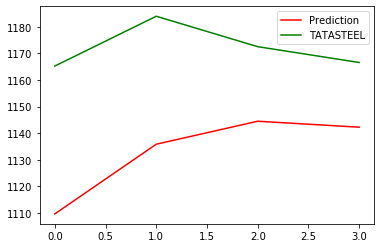

In [22]:
plt.plot(prediction, color='red', label='Prediction')
plt.plot(real_price, color='green', label='TATASTEEL')
plt.legend()
plt.show()